# Assignment - Telecom Churn 

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

# Requirement -

For many incumbent operators, retaining high profitable customers is the number one business
goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn.

# Objective -

In this competition, your goal is to build a machine learning model that is able to predict churning customers based on the features provided for their usage.

## Step 1: Reading and Understanding the Data

In [2]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd #To work with dataset
import matplotlib.pyplot as plt#visualization
%matplotlib inline
import seaborn as sns#visualization
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, learning_curve, train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score , plot_roc_curve, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

import xgboost as xgb

# Importing required packages for visualization
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
#import pydotplus, graphviz

In [3]:
#Displays all the rows
pd.set_option('display.max_rows', None)
#Standardise precision
pd.options.display.float_format = "{:,.4f}".format
#Set style for plots
sns.set(style = "whitegrid")

In [4]:
#Read the input file 'train.csv'
telecom_train= pd.read_csv("train.csv")
#Display first few rows
telecom_train.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0   0        109          0.0000          0.0000          0.0000   
1   1        109          0.0000          0.0000          0.0000   
2   2        109          0.0000          0.0000          0.0000   
3   3        109          0.0000          0.0000          0.0000   
4   4        109          0.0000          0.0000          0.0000   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014  31.2770   
1            6/30/2014            7/31/2014            8/31/2014   0.0000   
2            6/30/2014            7/31/2014            8/31/2014  60.8060   
3            6/30/2014            7/31/2014            8/31/2014 156.3620   
4            6/30/2014            7/31/2014            8/31/2014 240.7080   

    arpu_7  ...  sachet_3g_7  sachet_3g_8  fb_user_6  fb_user_7  fb_user_8  \
0  87.0090  ...            0            0        NaN        NaN        NaN   
1 122.7870  ...            0            0        NaN     1.0000        NaN   
2 103.1760  ...            0            0        NaN        NaN        NaN   
3 205.2600  ...            0            0        NaN        NaN        NaN   
4 128.1910  ...            1            0     1.0000     1.0000     1.0000   

    aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  churn_probability  
0  1958      0.0000      0.0000      0.0000                  0  
1   710      0.0000      0.0000      0.0000                  0  
2   882      0.0000      0.0000      0.0000                  0  
3   982      0.0000      0.0000      0.0000                  0  
4   647      0.0000      0.0000      0.0000                  0  

[5 rows x 172 columns]

In [5]:
#Read the input file 'test (1).csv'
telecom_test= pd.read_csv("test (1).csv")
#Display first few rows
telecom_test.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0  69999        109          0.0000          0.0000          0.0000   
1  70000        109          0.0000          0.0000          0.0000   
2  70001        109          0.0000          0.0000          0.0000   
3  70002        109          0.0000          0.0000          0.0000   
4  70003        109          0.0000          0.0000          0.0000   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014  91.8820   
1            6/30/2014            7/31/2014            8/31/2014 414.1680   
2            6/30/2014            7/31/2014            8/31/2014 329.8440   
3            6/30/2014            7/31/2014            8/31/2014  43.5500   
4            6/30/2014            7/31/2014            8/31/2014 306.8540   

    arpu_7  ...  sachet_3g_6  sachet_3g_7  sachet_3g_8  fb_user_6  fb_user_7  \
0  65.3300  ...            0            0            0        NaN        NaN   
1 515.5680  ...            0            0            0        NaN        NaN   
2 434.8840  ...            0            0            0        NaN        NaN   
3 171.3900  ...            0            0            0        NaN        NaN   
4 406.2890  ...            0            0            0        NaN        NaN   

   fb_user_8   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  
0        NaN  1692      0.0000      0.0000      0.0000  
1        NaN  2533      0.0000      0.0000      0.0000  
2        NaN   277    525.6100    758.4100    241.8400  
3        NaN  1244      0.0000      0.0000      0.0000  
4        NaN   462      0.0000      0.0000      0.0000  

[5 rows x 171 columns]

In [6]:
#check the shape of the dataframes both train and test
telecom_train.shape, telecom_test.shape

((69999, 172), (30000, 171))

In [7]:
telecom_train.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

In [8]:
telecom_test.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 171 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

In [9]:
telecom_train.describe()

id   circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
count 69,999.0000 69,999.0000     69,297.0000     69,297.0000     69,297.0000   
mean  34,999.0000    109.0000          0.0000          0.0000          0.0000   
std   20,207.1151      0.0000          0.0000          0.0000          0.0000   
min        0.0000    109.0000          0.0000          0.0000          0.0000   
25%   17,499.5000    109.0000          0.0000          0.0000          0.0000   
50%   34,999.0000    109.0000          0.0000          0.0000          0.0000   
75%   52,498.5000    109.0000          0.0000          0.0000          0.0000   
max   69,998.0000    109.0000          0.0000          0.0000          0.0000   

           arpu_6      arpu_7      arpu_8  onnet_mou_6  onnet_mou_7  ...  \
count 69,999.0000 69,999.0000 69,999.0000  67,231.0000  67,312.0000  ...   
mean     283.1344    278.1859    278.8588     133.1533     133.8944  ...   
std      334.2139    344.3669    351.9243     299.9631     311.2772  ...   
min   -2,258.7090 -1,289.7150   -945.8080       0.0000       0.0000  ...   
25%       93.5810     86.7140     84.0950       7.4100       6.6750  ...   
50%      197.4840    191.5880    192.2340      34.1100      32.2800  ...   
75%      370.7910    365.3695    369.9090     119.3900     115.8375  ...   
max   27,731.0880 35,145.8340 33,543.6240   7,376.7100   8,157.7800  ...   

       sachet_3g_7  sachet_3g_8   fb_user_6   fb_user_7   fb_user_8  \
count  69,999.0000  69,999.0000 17,568.0000 17,865.0000 18,417.0000   
mean        0.0814       0.0855      0.9163      0.9095      0.8903   
std         0.6345       0.6800      0.2769      0.2868      0.3125   
min         0.0000       0.0000      0.0000      0.0000      0.0000   
25%         0.0000       0.0000      1.0000      1.0000      1.0000   
50%         0.0000       0.0000      1.0000      1.0000      1.0000   
75%         0.0000       0.0000      1.0000      1.0000      1.0000   
max        33.0000      41.0000      1.0000      1.0000      1.0000   

              aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  churn_probability  
count 69,999.0000 69,999.0000 69,999.0000 69,999.0000        69,999.0000  
mean   1,220.6397     68.1086     65.9358     60.0767             0.1019  
std      952.4263    269.3287    267.8990    257.2268             0.3025  
min      180.0000      0.0000      0.0000      0.0000             0.0000  
25%      468.0000      0.0000      0.0000      0.0000             0.0000  
50%      868.0000      0.0000      0.0000      0.0000             0.0000  
75%    1,813.0000      0.0000      0.0000      0.0000             0.0000  
max    4,337.0000 12,916.2200  9,165.6000 11,166.2100             1.0000  

[8 rows x 163 columns]

In [10]:
# Counting the number of rows have all missing values
print('Number of empty Rows:')
print(telecom_train.isnull().all(axis=1).sum())
# --> There are no empty rows in whole dataset.

# Counting the number of columns have all missing values
print('Number of empty Columns:')
print(telecom_train.isnull().all(axis=0).sum())

# --> There are no empty columns in whole dataset.

Number of empty Rows:
0
Number of empty Columns:
0


In [11]:
#Find the percentage of missing values in the train data columns
round((telecom_train.isnull().sum()/len(telecom_train.index))*100,2).sort_values(ascending=False)


arpu_3g_6                  74.9000
count_rech_2g_6            74.9000
night_pck_user_6           74.9000
arpu_2g_6                  74.9000
date_of_last_rech_data_6   74.9000
total_rech_data_6          74.9000
av_rech_amt_data_6         74.9000
max_rech_data_6            74.9000
count_rech_3g_6            74.9000
fb_user_6                  74.9000
night_pck_user_7           74.4800
date_of_last_rech_data_7   74.4800
total_rech_data_7          74.4800
max_rech_data_7            74.4800
fb_user_7                  74.4800
count_rech_2g_7            74.4800
count_rech_3g_7            74.4800
arpu_3g_7                  74.4800
av_rech_amt_data_7         74.4800
arpu_2g_7                  74.4800
count_rech_2g_8            73.6900
av_rech_amt_data_8         73.6900
night_pck_user_8           73.6900
max_rech_data_8            73.6900
total_rech_data_8          73.6900
arpu_2g_8                  73.6900
arpu_3g_8                  73.6900
date_of_last_rech_data_8   73.6900
fb_user_8           

In [12]:
####Find the percentage of missing values in the test data columns
round((telecom_test.isnull().sum()/len(telecom_test.index))*100,2).sort_values(ascending=False)

arpu_3g_6                  74.7200
count_rech_3g_6            74.7200
fb_user_6                  74.7200
night_pck_user_6           74.7200
total_rech_data_6          74.7200
max_rech_data_6            74.7200
count_rech_2g_6            74.7200
date_of_last_rech_data_6   74.7200
av_rech_amt_data_6         74.7200
arpu_2g_6                  74.7200
night_pck_user_7           74.3100
arpu_2g_7                  74.3100
fb_user_7                  74.3100
arpu_3g_7                  74.3100
count_rech_2g_7            74.3100
av_rech_amt_data_7         74.3100
max_rech_data_7            74.3100
count_rech_3g_7            74.3100
total_rech_data_7          74.3100
date_of_last_rech_data_7   74.3100
night_pck_user_8           73.5900
arpu_3g_8                  73.5900
arpu_2g_8                  73.5900
count_rech_3g_8            73.5900
total_rech_data_8          73.5900
av_rech_amt_data_8         73.5900
max_rech_data_8            73.5900
fb_user_8                  73.5900
count_rech_2g_8     

## Step 2: Data Cleaning

In [13]:
# Extracting the date columns
date_cols = [x for x in telecom_train.columns if "date" in x]

In [14]:
# Checking the date columns
print(round(telecom_train[date_cols].isnull().sum() / telecom_train.shape[0] *100,2))

last_date_of_month_6        0.0000
last_date_of_month_7        0.5700
last_date_of_month_8        1.0500
date_of_last_rech_6         1.5700
date_of_last_rech_7         1.7600
date_of_last_rech_8         3.5200
date_of_last_rech_data_6   74.9000
date_of_last_rech_data_7   74.4800
date_of_last_rech_data_8   73.6900
dtype: float64


In [15]:
# Creating a function to fill mode values
def fill_mode_cols(df, col_list):
    for cols in col_list:
        mode = df[cols].mode()[0]
        df[cols].fillna(value=mode, inplace=True)

# Clearing last dates and last rech columns
fill_mode_cols(telecom_train, date_cols[:6])
fill_mode_cols(telecom_test, date_cols[:6])

In [16]:
# Converting date series columns into useful information
total_dataset = [telecom_train, telecom_test]
for df in total_dataset:
    # Converting date columns into date time format
    df[date_cols] = df[date_cols].apply(pd.to_datetime)

    # Creating recency recharge column
    df["recent_rech_6"] = df["last_date_of_month_6"] - df["date_of_last_rech_6"]
    df["recent_rech_7"] = df["last_date_of_month_7"] - df["date_of_last_rech_7"]
    df["recent_rech_8"] = df["last_date_of_month_8"] - df["date_of_last_rech_8"]

    # Creating recency recharge for data column
    df["recent_rech_data_6"] = df["last_date_of_month_6"] - df["date_of_last_rech_data_6"]
    df["recent_rech_data_7"] = df["last_date_of_month_7"] - df["date_of_last_rech_data_7"]
    df["recent_rech_data_8"] = df["last_date_of_month_8"] - df["date_of_last_rech_data_8"]

In [17]:
# Creating a list of recency columns in the dataset
recency_cols = [x for x in telecom_train.columns if "recent" in x]

# Extracting the dates from the columns
for df in total_dataset:
    for cols in recency_cols:
        df[cols] = df[cols].astype(str)
        df[cols] = df[cols].str.split(" ",expand=True)[0]
    
# Imputing the missing values in the recency cols with zero
for df in total_dataset:
    for cols in recency_cols:
        df.loc[(df[cols]=="NaT"), cols] = 0
    
# Dropping the dates columns which is reduntant columns
for df in total_dataset:
    df.drop(date_cols, axis=1, inplace=True)

In [18]:
telecom_train.shape

(69999, 169)

In [19]:
telecom_test.shape

(30000, 168)

In [20]:
# Finding Unique Values in Columns

uniq_cols= []
for col in telecom_train.columns:
    if telecom_train[col].nunique() == 1:
        print(col, telecom_train[col].nunique())
        uniq_cols.append(col)

circle_id 1
loc_og_t2o_mou 1
std_og_t2o_mou 1
loc_ic_t2o_mou 1
std_og_t2c_mou_6 1
std_og_t2c_mou_7 1
std_og_t2c_mou_8 1
std_ic_t2o_mou_6 1
std_ic_t2o_mou_7 1
std_ic_t2o_mou_8 1


Dropping unique value columns from both train and test data

In [21]:
telecom_train.drop(columns = uniq_cols, axis = 1, inplace = True)
telecom_test.drop(columns = uniq_cols, axis = 1, inplace = True)

In [22]:
telecom_train.shape , telecom_test.shape

((69999, 159), (30000, 158))

In [23]:
#Checking features which has only two unqiue values
categorical_features = []
for each_col in list(telecom_train.columns):
    if telecom_train[each_col].nunique() == 2:
        print(each_col,' => ', telecom_train[each_col].unique())
        categorical_features.append(each_col)

night_pck_user_6  =>  [nan  0.  1.]
night_pck_user_7  =>  [nan  0.  1.]
night_pck_user_8  =>  [nan  0.  1.]
fb_user_6  =>  [nan  1.  0.]
fb_user_7  =>  [nan  1.  0.]
fb_user_8  =>  [nan  1.  0.]
churn_probability  =>  [0 1]


In [24]:
## There are NaN values in each column so we can impute those with the mode of that column
for each_col in categorical_features:
    if telecom_train[each_col].isna().sum()>0:
        telecom_train[each_col].fillna(telecom_train[each_col].mode()[0], inplace=True)
        telecom_test[each_col].fillna(telecom_test[each_col].mode()[0], inplace=True)

In [25]:
#Converting categorical columns datatype to category
telecom_train[['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8']]=telecom_train[['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8']].astype('category')
telecom_test[['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8']]=telecom_test[['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8']].astype('category')



In [26]:
#Imputing arpu columns(Average revenue per user) having null values with median values
arpu_cols = telecom_train.filter(regex = 'arpu')

for col in arpu_cols.columns:
    telecom_train[col] = telecom_train[col].fillna(value = telecom_train[col].median())
    telecom_test[col] = telecom_test[col].fillna(value = telecom_test[col].median())

In [27]:
# Imputing rest all null values in both train and test sets with 0

telecom_train = telecom_train.fillna(value = 0, axis = 1)
telecom_test = telecom_test.fillna(value = 0, axis = 1)

In [28]:
# Check for missing values

round((telecom_train.isnull().sum()/len(telecom_train.index))*100,2).sort_values(ascending=False)

id                   0.0000
count_rech_2g_6      0.0000
last_day_rch_amt_8   0.0000
total_rech_data_6    0.0000
total_rech_data_7    0.0000
total_rech_data_8    0.0000
max_rech_data_6      0.0000
max_rech_data_7      0.0000
max_rech_data_8      0.0000
count_rech_2g_7      0.0000
last_day_rch_amt_6   0.0000
count_rech_2g_8      0.0000
count_rech_3g_6      0.0000
count_rech_3g_7      0.0000
count_rech_3g_8      0.0000
av_rech_amt_data_6   0.0000
av_rech_amt_data_7   0.0000
av_rech_amt_data_8   0.0000
last_day_rch_amt_7   0.0000
max_rech_amt_8       0.0000
vol_2g_mb_7          0.0000
ic_others_7          0.0000
spl_ic_mou_6         0.0000
spl_ic_mou_7         0.0000
spl_ic_mou_8         0.0000
isd_ic_mou_6         0.0000
isd_ic_mou_7         0.0000
isd_ic_mou_8         0.0000
ic_others_6          0.0000
ic_others_8          0.0000
max_rech_amt_7       0.0000
total_rech_num_6     0.0000
total_rech_num_7     0.0000
total_rech_num_8     0.0000
total_rech_amt_6     0.0000
total_rech_amt_7    

In [29]:
round((telecom_test.isnull().sum()/len(telecom_test.index))*100,2).sort_values(ascending=False)

id                   0.0000
max_rech_data_8      0.0000
last_day_rch_amt_7   0.0000
last_day_rch_amt_8   0.0000
total_rech_data_6    0.0000
total_rech_data_7    0.0000
total_rech_data_8    0.0000
max_rech_data_6      0.0000
max_rech_data_7      0.0000
count_rech_2g_6      0.0000
max_rech_amt_8       0.0000
count_rech_2g_7      0.0000
count_rech_2g_8      0.0000
count_rech_3g_6      0.0000
count_rech_3g_7      0.0000
count_rech_3g_8      0.0000
av_rech_amt_data_6   0.0000
av_rech_amt_data_7   0.0000
last_day_rch_amt_6   0.0000
max_rech_amt_7       0.0000
vol_2g_mb_6          0.0000
ic_others_6          0.0000
total_ic_mou_8       0.0000
spl_ic_mou_6         0.0000
spl_ic_mou_7         0.0000
spl_ic_mou_8         0.0000
isd_ic_mou_6         0.0000
isd_ic_mou_7         0.0000
isd_ic_mou_8         0.0000
ic_others_7          0.0000
max_rech_amt_6       0.0000
ic_others_8          0.0000
total_rech_num_6     0.0000
total_rech_num_7     0.0000
total_rech_num_8     0.0000
total_rech_amt_6    

In [30]:
# checking for the presence of any more null values
telecom_train.isnull().values.any()

False

In [31]:
# checking for the presence of any more null values
telecom_test.isnull().values.any()

False

Hence, no missing values in the dataset

In [32]:
# Create few more variables for total calls MOU,total internet usage(2g and 3g) for each month 6,7,8 for both test and train sets
telecom_train['total_mou_6']=telecom_train['offnet_mou_6']+telecom_train['onnet_mou_6']
telecom_train['total_mou_7']=telecom_train['offnet_mou_7']+telecom_train['onnet_mou_7']
telecom_train['total_mou_8']=telecom_train['offnet_mou_8']+telecom_train['onnet_mou_8']

telecom_train['total_internet_vol_6']=telecom_train['vol_2g_mb_6']+telecom_train['vol_3g_mb_6']
telecom_train['total_internet_vol_7']=telecom_train['vol_2g_mb_7']+telecom_train['vol_3g_mb_7']
telecom_train['total_internet_vol_8']=telecom_train['vol_2g_mb_8']+telecom_train['vol_3g_mb_8']
#For test dataset
telecom_test['total_mou_6']=telecom_test['offnet_mou_6']+telecom_test['onnet_mou_6']
telecom_test['total_mou_7']=telecom_test['offnet_mou_7']+telecom_test['onnet_mou_7']
telecom_test['total_mou_8']=telecom_test['offnet_mou_8']+telecom_test['onnet_mou_8']

telecom_test['total_internet_vol_6']=telecom_test['vol_2g_mb_6']+telecom_test['vol_3g_mb_6']
telecom_test['total_internet_vol_7']=telecom_test['vol_2g_mb_7']+telecom_test['vol_3g_mb_7']
telecom_test['total_internet_vol_8']=telecom_test['vol_2g_mb_8']+telecom_test['vol_3g_mb_8']

#Drop the columns from which new variables are created
telecom_train.drop(['offnet_mou_6','offnet_mou_7','offnet_mou_8','onnet_mou_6','onnet_mou_7','onnet_mou_8',
              'vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8','vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8'], axis = 1, inplace = True)
telecom_test.drop(['offnet_mou_6','offnet_mou_7','offnet_mou_8','onnet_mou_6','onnet_mou_7','onnet_mou_8',
                  'vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8','vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8'], axis = 1, inplace = True)

#Dropping the id column as it might not be useful
telecom_train.drop('id', axis = 1, inplace = True)
telecom_test.drop('id', axis = 1, inplace = True)

- All the missing values in the data are fixed.
- Derived few features from existing ones.
- Dropped few features.

Lets plot the variables and check more.

## Step 3 : Data Visualization

In [33]:
# lets find out churn/non churn percentage
telecom_train['churn_probability'].value_counts()/len(telecom_train)*100

#observation : 90% of the customers do not churn, this might be a case of class imbalance


0   89.8113
1   10.1887
Name: churn_probability, dtype: float64

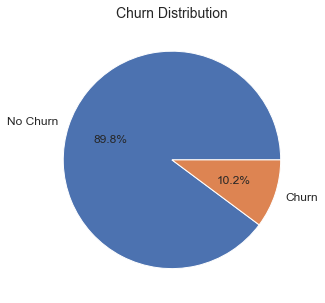

In [34]:
# Plotting Pie chart for Churn Rate
ax = (telecom_train['churn_probability'].value_counts()*100.0 /len(telecom_train)).plot.pie(autopct='%.1f%%', labels = ['No Churn', 'Churn'],figsize =(5,5), fontsize = 12)                                                                           
ax.set_ylabel('',fontsize = 12)
ax.set_title('Churn Distribution', fontsize = 14)
plt.show()

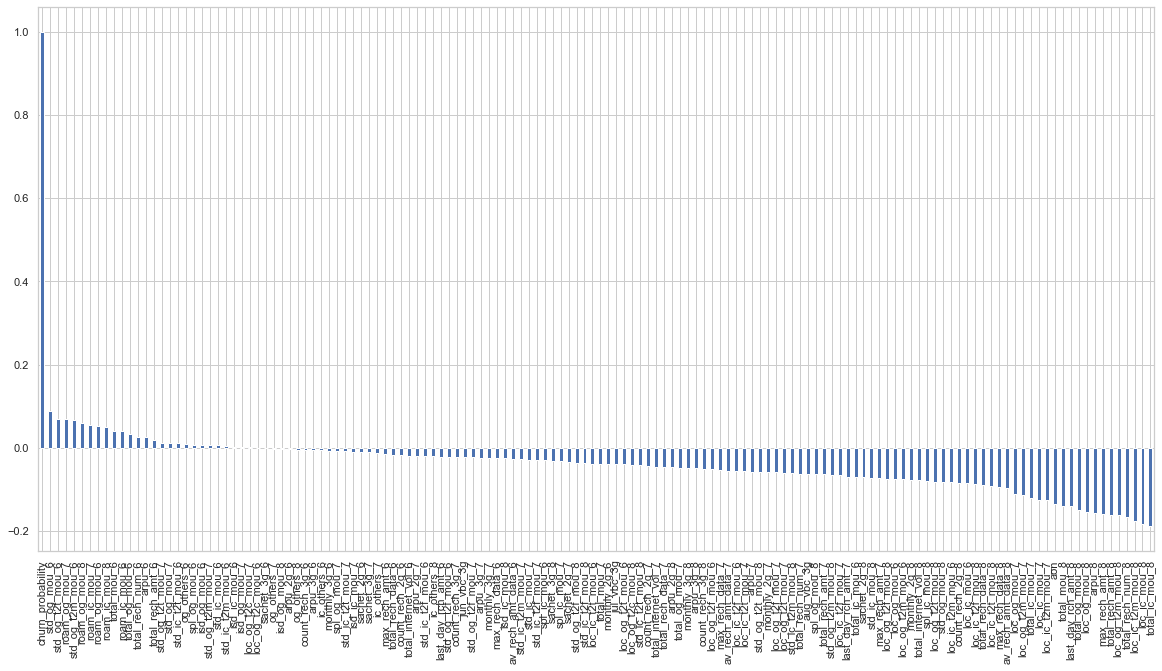

In [35]:
## Plot correlation of each variable with Churn 
plt.figure(figsize=(20,10))
telecom_train.corr()['churn_probability'].sort_values(ascending = False).plot(kind='bar')
plt.show()

In [36]:
# all numeric (float and int) variables in the dataset
telecom_numeric = telecom_train.select_dtypes(include=['float64', 'int64'])
# all categorical variables in the dataset
telecom_category = telecom_train.select_dtypes(include=['category'])


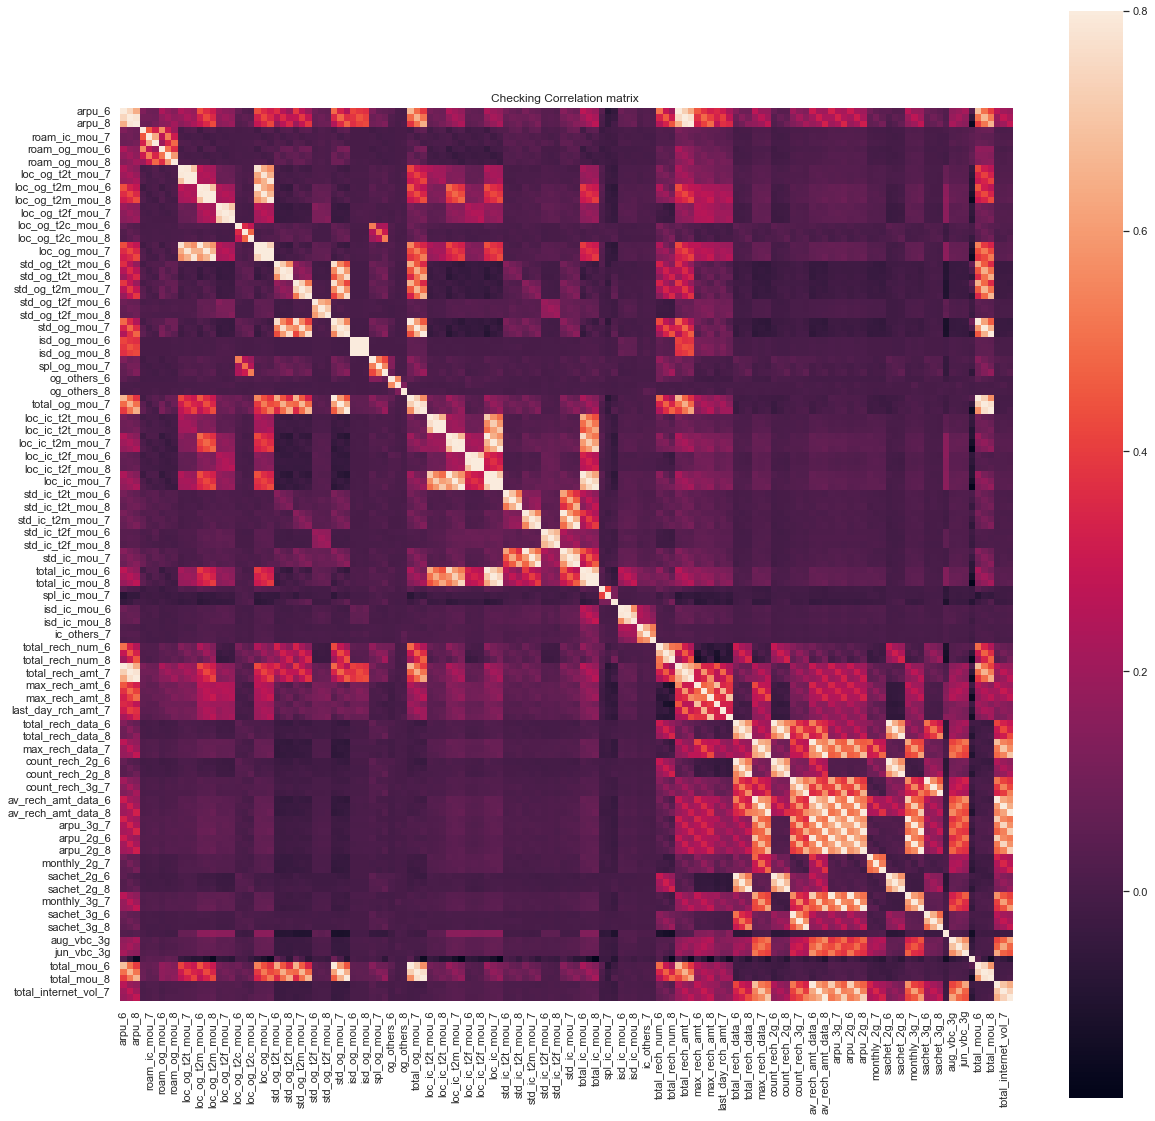

In [37]:
#checking the correlation matrix
corrmat = telecom_train.corr()
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.title("Checking Correlation matrix ")
plt.show()

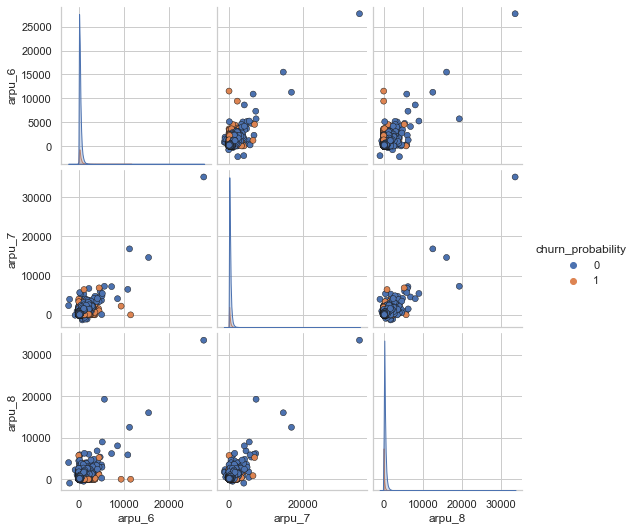

In [38]:
# Pair Plot for ARPU(Average Revenue per user in each month) features
sns.pairplot(telecom_train,vars=['arpu_6','arpu_7','arpu_8'],hue='churn_probability',plot_kws = {'edgecolor': 'k'})
plt.show()

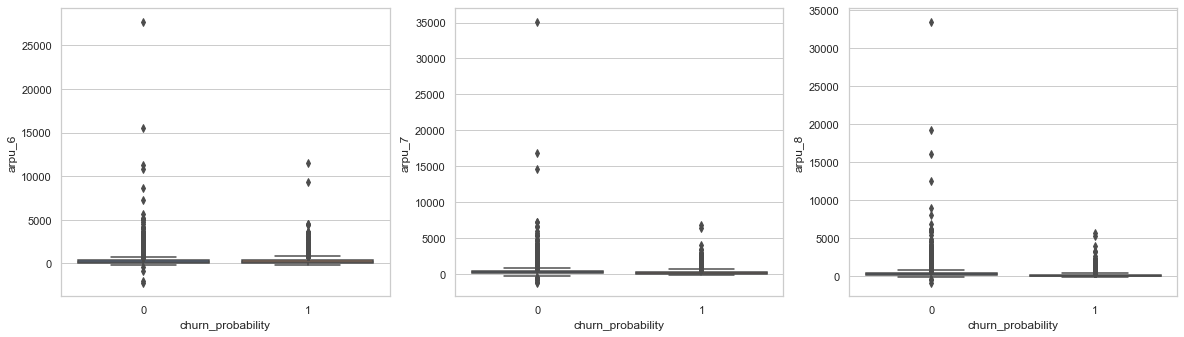

In [39]:
#ARPU(Average Revenue per user in each month) features
plt.figure(figsize=(20, 18))
plt.subplot(3,3,1)
sns.boxplot(x = 'churn_probability', y = 'arpu_6', data = telecom_train)
plt.subplot(3,3,2)
sns.boxplot(x = 'churn_probability', y = 'arpu_7', data = telecom_train)
plt.subplot(3,3,3)
sns.boxplot(x = 'churn_probability', y = 'arpu_8', data = telecom_train)
plt.show()

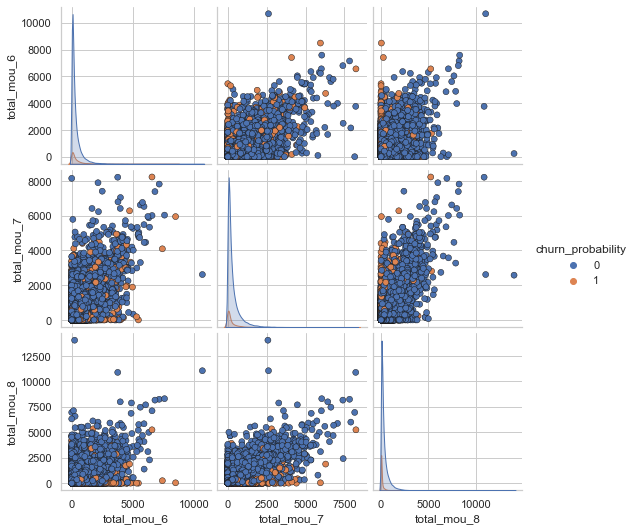

In [40]:
# Pair Plot total minutes of usage voice calls(both onnet and offnet)
sns.pairplot(telecom_train,vars=['total_mou_6','total_mou_7','total_mou_8'],hue='churn_probability',plot_kws = {'edgecolor': 'k'})
plt.show()

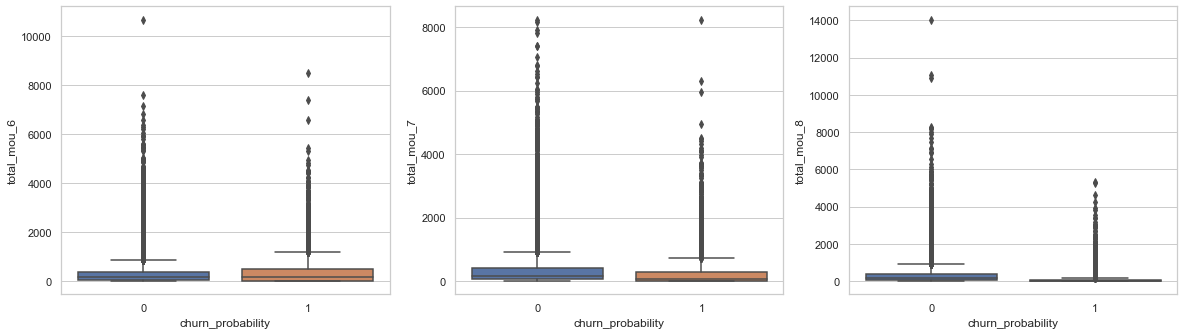

In [41]:
#total minutes of usage voice calls(both onnet and offnet) features
plt.figure(figsize=(20, 18))
plt.subplot(3,3,1)
sns.boxplot(x = 'churn_probability', y = 'total_mou_6', data = telecom_train)
plt.subplot(3,3,2)
sns.boxplot(x = 'churn_probability', y = 'total_mou_7', data = telecom_train)
plt.subplot(3,3,3)
sns.boxplot(x = 'churn_probability', y = 'total_mou_8', data = telecom_train)
plt.show()

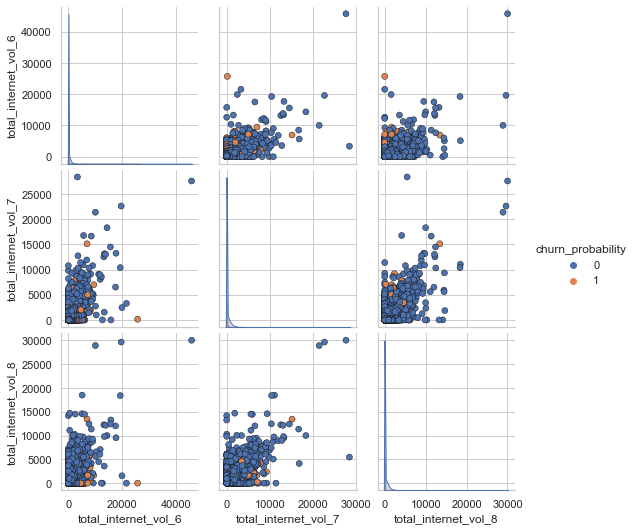

In [42]:
# Pair Plot for total internet usage(both 2G/3G)
sns.pairplot(telecom_train,vars=['total_internet_vol_6','total_internet_vol_7','total_internet_vol_8'],hue='churn_probability',plot_kws = {'edgecolor': 'k'})
plt.show()

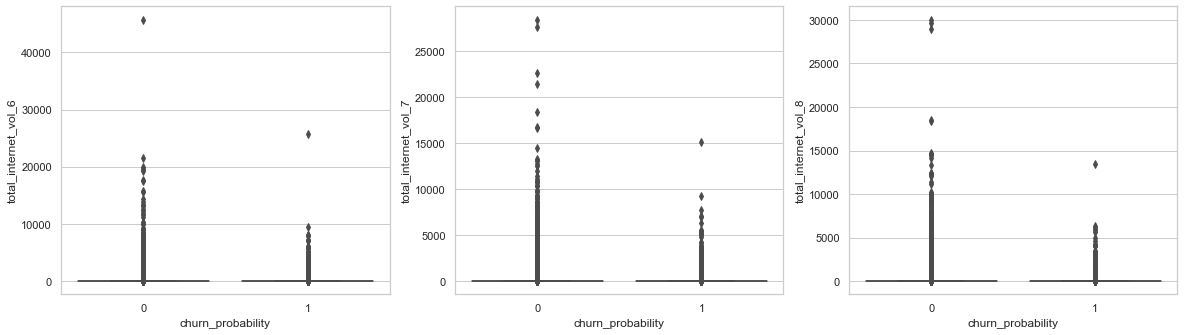

In [43]:
#total internet usage(both 2G/3G)
plt.figure(figsize=(20, 18))
plt.subplot(3,3,1)
sns.boxplot(x = 'churn_probability', y = 'total_internet_vol_6', data = telecom_train)
plt.subplot(3,3,2)
sns.boxplot(x = 'churn_probability', y = 'total_internet_vol_7', data = telecom_train)
plt.subplot(3,3,3)
sns.boxplot(x = 'churn_probability', y = 'total_internet_vol_8', data = telecom_train)
plt.show()

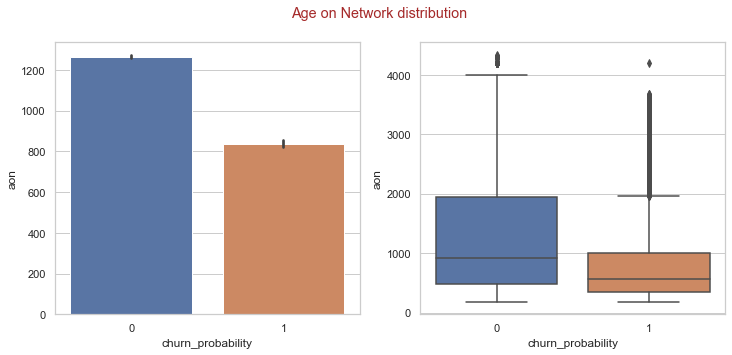

In [44]:
#AON(Age on network spread)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.barplot(data=telecom_train,x='churn_probability',y='aon')
plt.subplot(1,2,2)
sns.boxplot(data=telecom_train,x='churn_probability',y='aon')
plt.suptitle("Age on Network distribution",fontdict={'fontsize': 14, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()

- As the Age on Network is High the Churn Rate is Low.
- Churn Rate is low if Age on Network is above 1000 days.

In [45]:

#Below function is used for handling the outliers considering lower and upper quantiles as 0.05 & 0.95 respectively.
#Also checking for some of the columns and the others will be taken care during Sclaing

cols =  ['arpu_6','arpu_7','arpu_8','total_mou_6','total_mou_7','total_mou_8','total_internet_vol_6','total_internet_vol_7','total_internet_vol_8']

    
Q1 = telecom_train[cols].quantile(0.05)
Q3 = telecom_train[cols].quantile(0.95)
IQR = Q3 - Q1

telecom_train = telecom_train[~((telecom_train[cols] < (Q1 - 1.5 * IQR)) |(telecom_train[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
telecom_train.shape

(68082, 152)

In [46]:
#Rename the columns

telecom_train.rename({'last_day_rch_amt_6': 'last_day_rech_amt_6', 'last_day_rch_amt_7': 'last_day_rech_amt_7', 'last_day_rch_amt_8': 'last_day_rech_amt_8'},axis = 1, inplace = True)
telecom_test.rename({'last_day_rch_amt_6': 'last_day_rech_amt_6', 'last_day_rch_amt_7': 'last_day_rech_amt_7', 'last_day_rch_amt_8': 'last_day_rech_amt_8'},axis = 1, inplace = True)

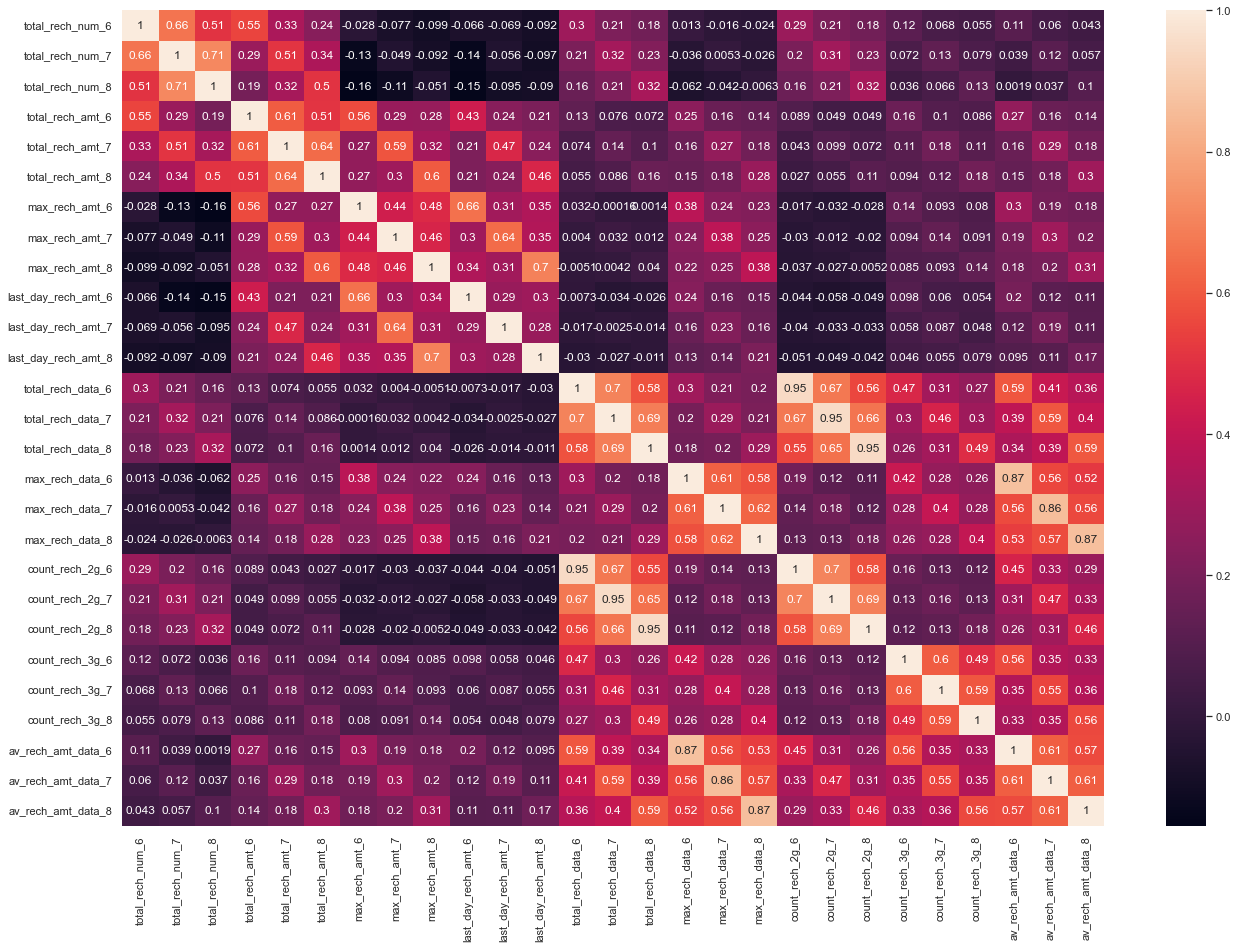

In [47]:
#Heatmap for Rechargae columns
rech_df = telecom_train.filter(regex = 'rech')
fig = plt.figure(figsize=(22, 15))
sns.heatmap(rech_df.corr(), annot = True)
plt.show()

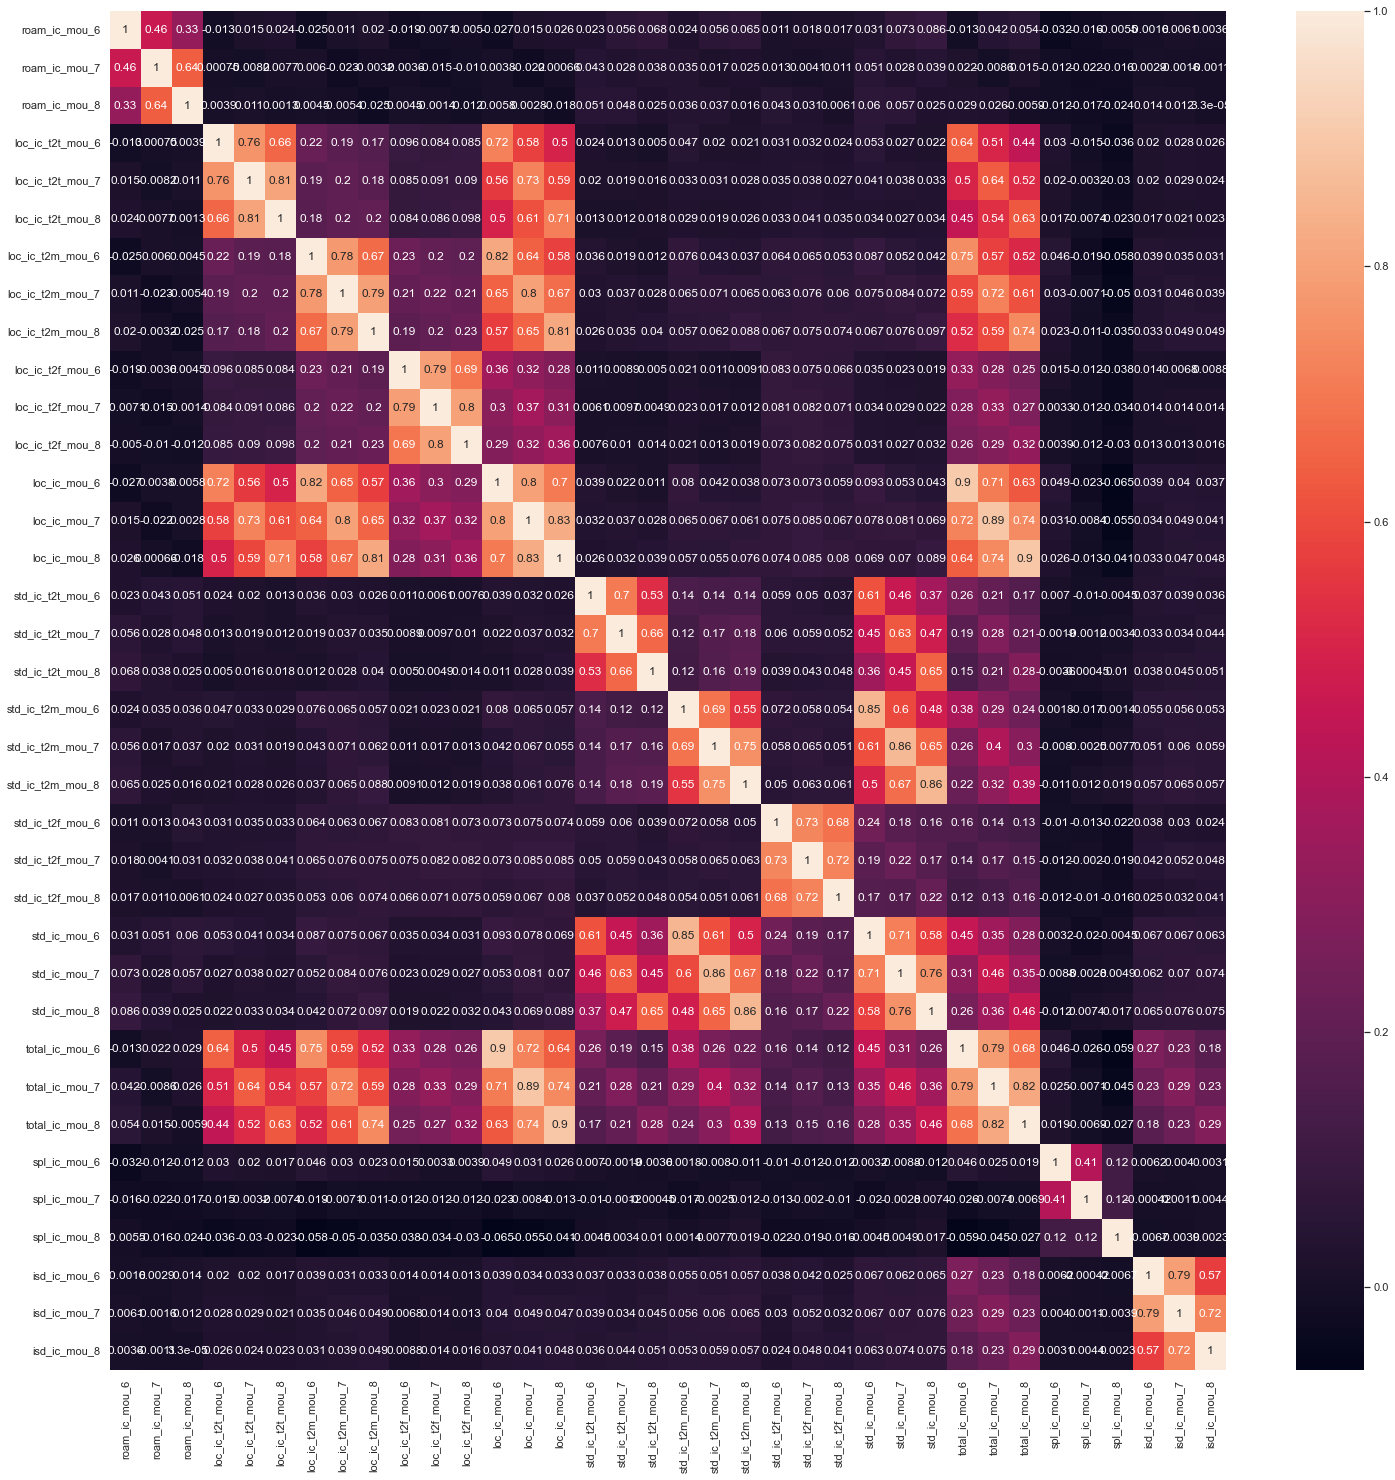

In [48]:
#Heatmap for Incoming MOU calls columns

ic_mou_df = telecom_train.filter(regex='ic.*mou')
fig = plt.figure(figsize=(25, 25))
sns.heatmap(ic_mou_df.corr(), annot = True)
plt.show()

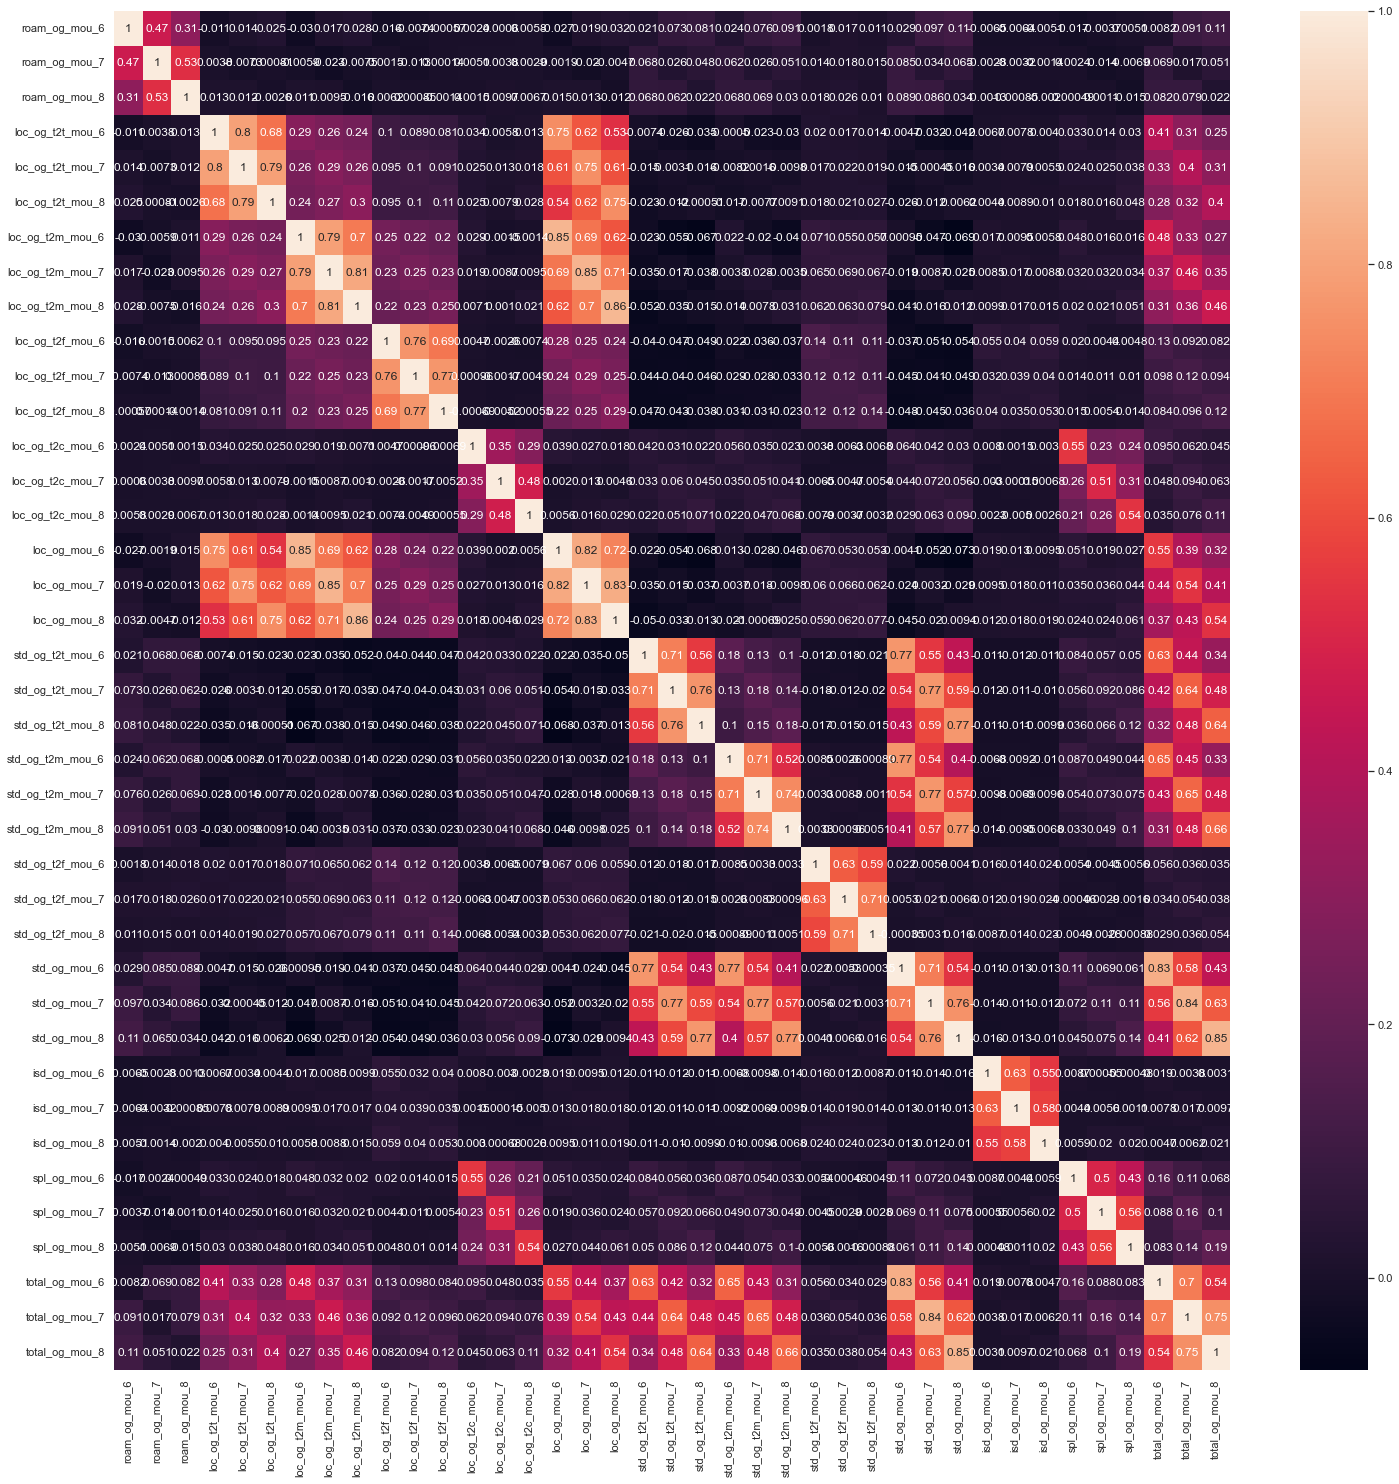

In [49]:
# Heatmap Outgoing MOU calls
og_mou_df = telecom_train.filter(regex='og.*mou')
fig = plt.figure(figsize=(25, 25))
sns.heatmap(og_mou_df.corr(), annot = True)
plt.show()

Index(['count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'arpu_3g_6',
       'arpu_3g_7', 'arpu_3g_8', 'monthly_3g_6', 'monthly_3g_7',
       'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8',
       'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g'],
      dtype='object')


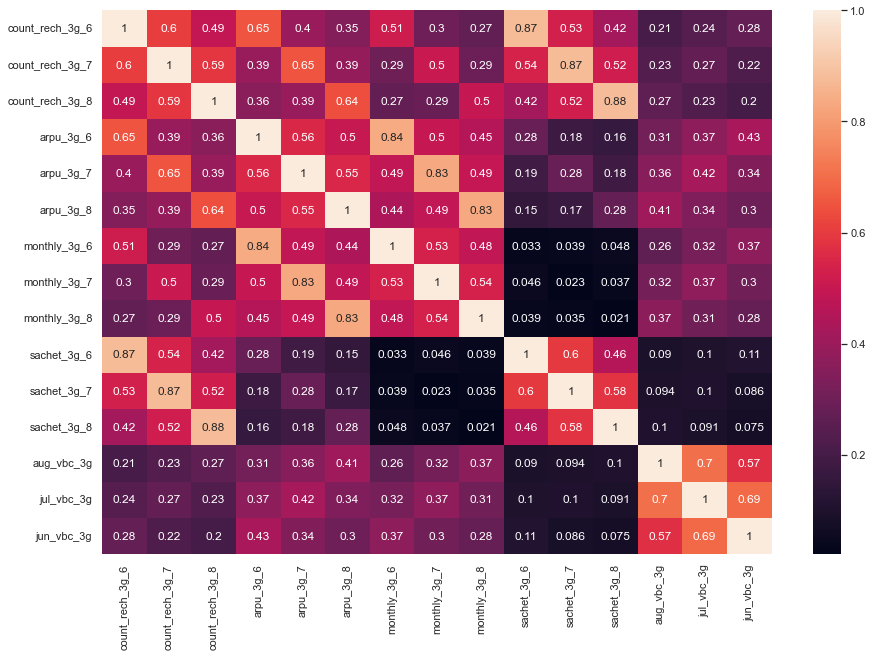

In [50]:
net3g_df = telecom_train.filter(regex='3g')
print(net3g_df.columns)
fig = plt.figure(figsize=(15, 10))
sns.heatmap(net3g_df.corr(), annot = True)
plt.show()

Index(['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'arpu_2g_6',
       'arpu_2g_7', 'arpu_2g_8', 'monthly_2g_6', 'monthly_2g_7',
       'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8'],
      dtype='object')


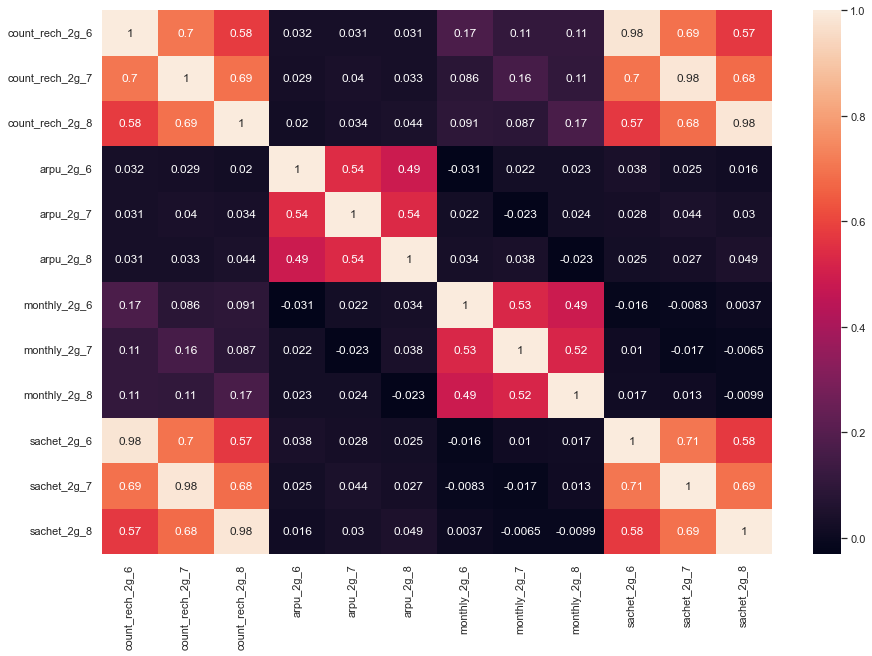

In [51]:
net2g_df = telecom_train.filter(regex='2g')
print(net2g_df.columns)
fig = plt.figure(figsize=(15, 10))
sns.heatmap(net2g_df.corr(), annot = True)
plt.show()

From all the above correlation plots, noticed multi collinearity between different features. Dropping some of the following highly correlated features, rest will be taken care during PCA.

- count_rech_2g_6, count_rech_2g_7, count_rech_2g_8,
- count_rech_3g_6, count_rech_3g_7, count_rech_3g_8,
- last_day_rech_amt_6,last_day_rech_amt_7,last_day_rech_amt_8

In [52]:
drop_cols=['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8','count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
           'last_day_rech_amt_6','last_day_rech_amt_7','last_day_rech_amt_8']
telecom_train.drop(columns = drop_cols, axis = 1, inplace = True)
telecom_test.drop(columns = drop_cols, axis = 1, inplace = True)

In [53]:
print("Telecom Train set Shape", telecom_train.shape)
print("Telecom Test set shape",telecom_test.shape)

Telecom Train set Shape (68082, 143)
Telecom Test set shape (30000, 142)


##### Splitting the Data into Training and Testing Sets

In [54]:
# Putting feature variables to X_train
X= telecom_train.drop(['churn_probability'],axis=1)

# Putting response variable to y_train
y = telecom_train['churn_probability']

X.shape,y.shape

((68082, 142), (68082,))

In [55]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7,stratify=y)
print("Dimension of X_train:", X_train.shape)
print("Dimension of X_test:", X_test.shape)

Dimension of X_train: (47657, 142)
Dimension of X_test: (20425, 142)


##### Rescaling features

In [56]:
scaler=StandardScaler()
X_train_sc=scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [57]:
# As seen, Dataset is imbalanced. Treid running SMOTE technique but didnt see major chnages in the output and 
#lot of noisy points are generated, So using stratify option while train test split
#import imblearn
#from imblearn.over_sampling import SMOTE

#sm = SMOTE()
#X_train_sm,y_train_sm = sm.fit_resample(X_train_sc,y_train)

In [58]:
#print("Dimension of X_train_sm Shape:", X_train_sm.shape)
#print("Dimension of y_train_sm Shape:", y_train_sm.shape)
#print(y_train_sm.value_counts())
#print("Imbalance in Training dataset:",(y_train_sm != 0).sum()/(y_train_sm == 0).sum())

#### PCA

In [59]:
pca = PCA(random_state=42)
#pca = PCA()
pca.fit(X_train_sc)

PCA(random_state=42)

In [60]:
pca.components_

array([[ 1.78273632e-01,  1.93456348e-01,  1.82173233e-01, ...,
         9.02410967e-02,  9.72360034e-02,  9.29282769e-02],
       [-5.29607398e-02, -6.07067974e-02, -5.13999824e-02, ...,
         1.82823160e-01,  1.86819720e-01,  1.80720368e-01],
       [-5.17789178e-02, -7.19595462e-02, -6.65395245e-02, ...,
        -5.49266075e-02, -5.91456215e-02, -5.95328307e-02],
       ...,
       [-3.38429305e-16,  1.37286909e-16, -2.21372908e-17, ...,
         1.23384005e-16,  1.94051609e-17, -5.56397075e-17],
       [ 0.00000000e+00, -1.61435039e-16,  8.41458925e-17, ...,
        -7.59015848e-17,  9.69062540e-17,  2.94328865e-17],
       [ 0.00000000e+00,  1.17526395e-17,  8.73825911e-17, ...,
         6.40155968e-17,  5.60644180e-18, -1.16960185e-16]])

In [61]:
pca.explained_variance_ratio_

array([1.21855869e-01, 9.06955537e-02, 6.40463356e-02, 4.01253921e-02,
       3.83612626e-02, 2.60230283e-02, 2.36920711e-02, 2.33738373e-02,
       2.18339826e-02, 2.13669150e-02, 2.04809054e-02, 1.93651464e-02,
       1.81180137e-02, 1.62447483e-02, 1.55352306e-02, 1.52515127e-02,
       1.51498988e-02, 1.39223611e-02, 1.37194287e-02, 1.34940942e-02,
       1.25998528e-02, 1.17446455e-02, 1.13105001e-02, 1.12471359e-02,
       1.05440930e-02, 1.02905847e-02, 9.31316017e-03, 9.03791117e-03,
       8.96331434e-03, 8.78287765e-03, 8.39876331e-03, 8.32255157e-03,
       7.49913139e-03, 7.14599790e-03, 6.82569790e-03, 6.75695171e-03,
       6.68238554e-03, 6.39292208e-03, 6.29704136e-03, 6.13343166e-03,
       5.89696812e-03, 5.85921178e-03, 5.61051671e-03, 5.52959974e-03,
       5.45676159e-03, 5.38467596e-03, 5.30110842e-03, 5.06946158e-03,
       5.01281649e-03, 4.89330433e-03, 4.79287429e-03, 4.72917681e-03,
       4.64706265e-03, 4.42233121e-03, 4.30604492e-03, 4.24823000e-03,
      

In [62]:
var_cum = np.cumsum(pca.explained_variance_ratio_)

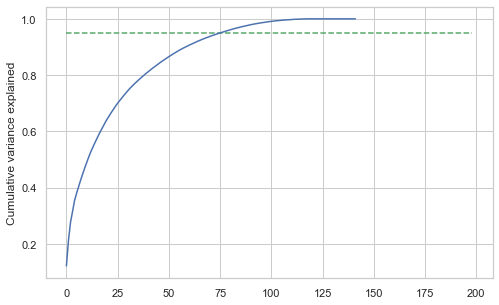

In [63]:
fig = plt.figure(figsize=[8,5])
plt.hlines(y=0.95, xmax=198, xmin=0, colors="g", linestyles="--")
plt.plot(var_cum)
plt.ylabel("Cumulative variance explained")
plt.show()

In [64]:
#PCA which explains 95% variance
pca_ag = PCA(0.95)

In [65]:
df_train_pca = pca_ag.fit_transform(X_train_sc)

df_train_pca.shape

(47657, 76)

In [66]:
df_test_pca = pca_ag.transform(X_test_sc)
df_test_pca.shape

(20425, 76)

In [67]:
# Creating correlation matrix for the principal components - we expect little to no correlation
corrmat = np.corrcoef(df_train_pca.transpose())
corrmat.shape

(76, 76)

<AxesSubplot:>

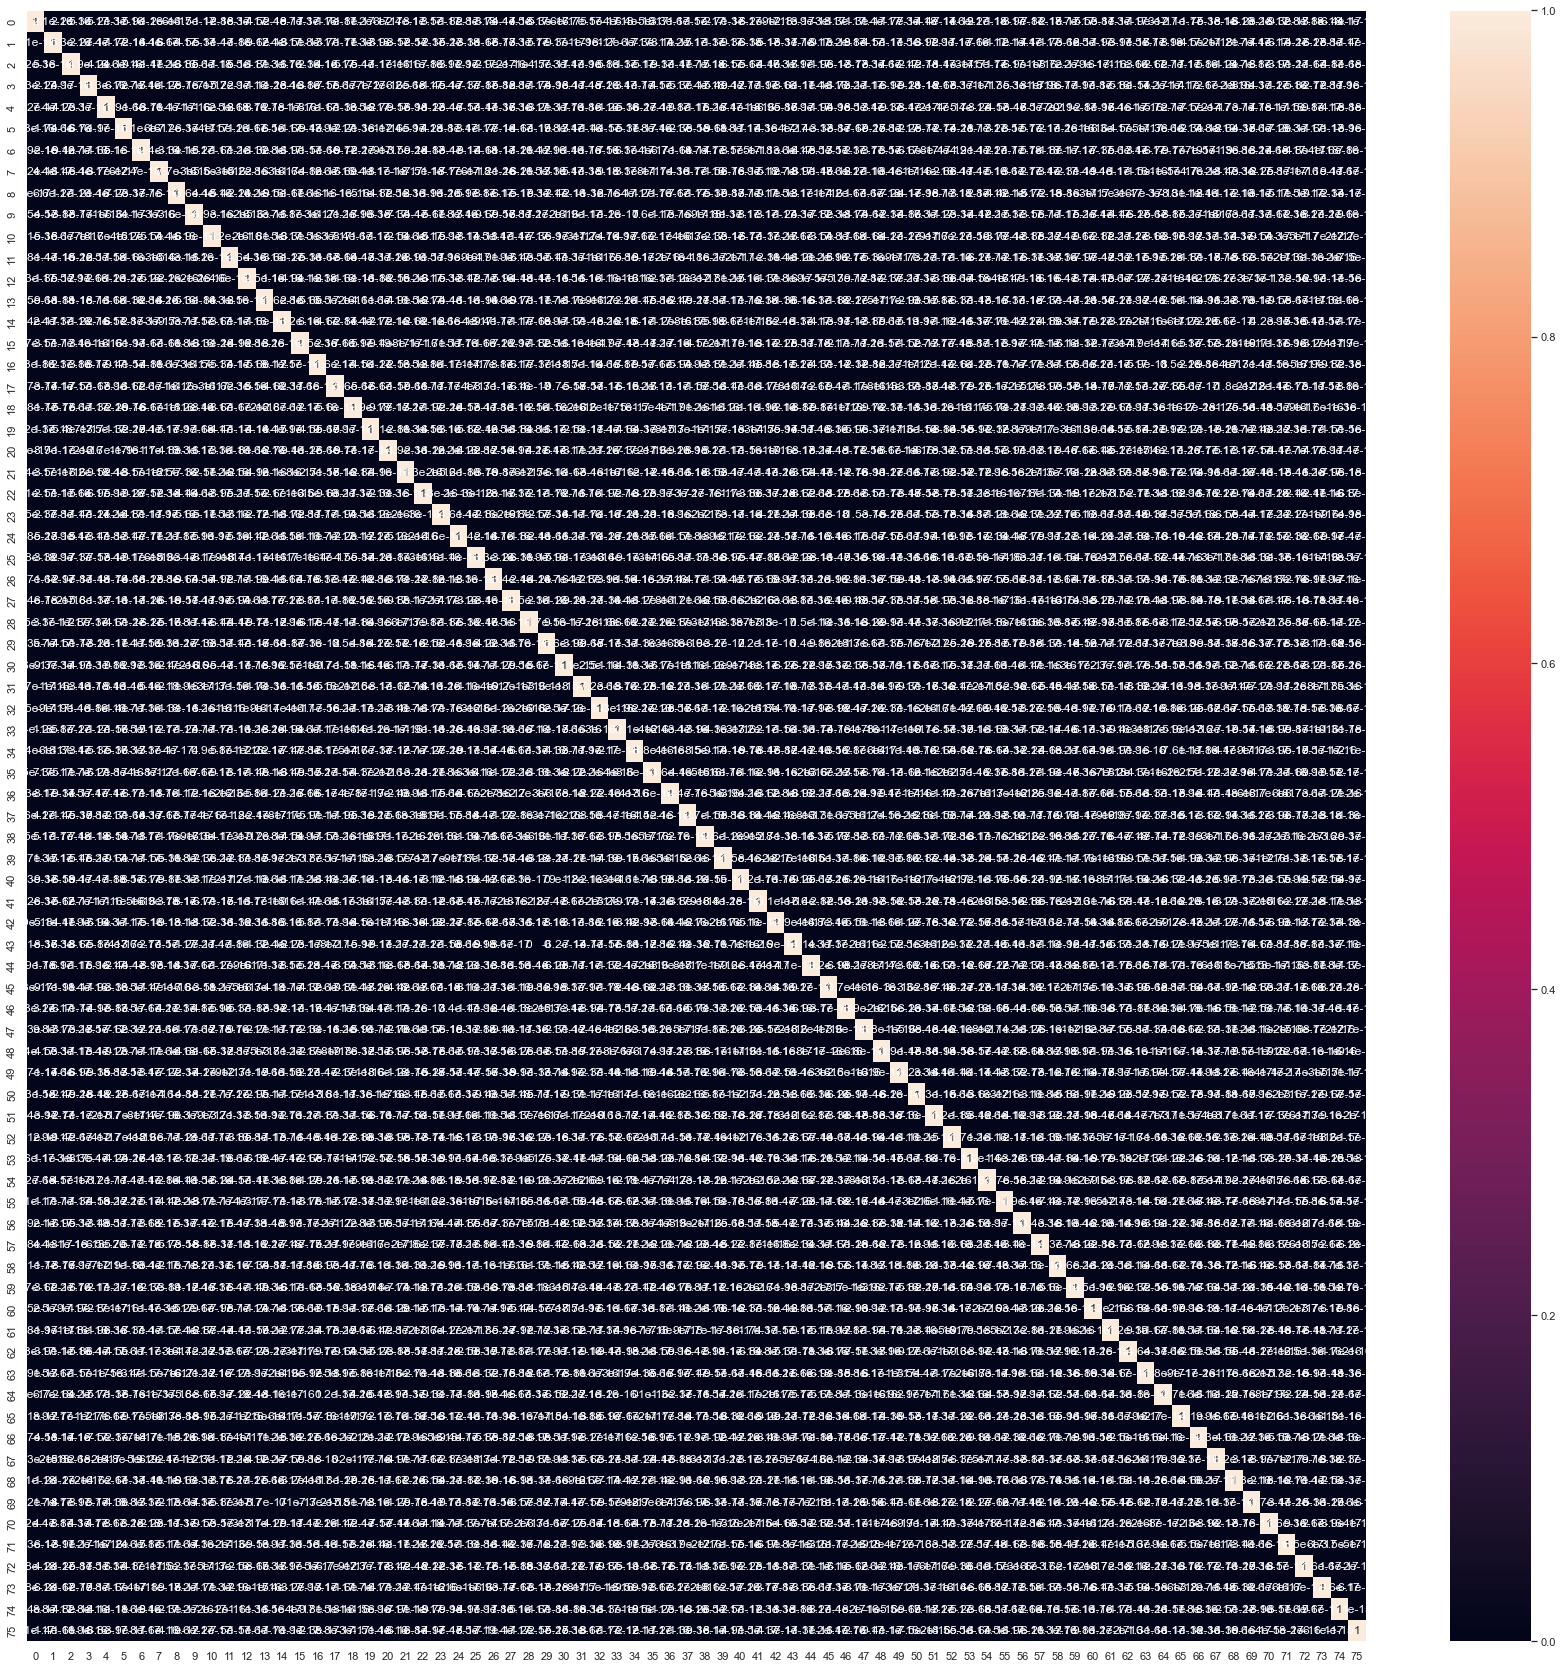

In [68]:
plt.figure(figsize=[30,30])
sns.heatmap(corrmat, annot=True)

In [69]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",'{:.20f}'.format(corrmat_nodiag.max()), ", min corr: ", '{:.20f}'.format(corrmat_nodiag.min()),)
# we see that correlations are indeed very close to 0

max corr: 0.00000000000000122229 , min corr:  -0.00000000000000119923


### Model Building

#### Applying logistic regression on the data on our Principal components

In [70]:
learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_train_pca, y_train)
pred_probs_test = model_pca.predict_proba(df_test_pca)
y_pred = model_pca.predict(df_test_pca)

In [71]:
#Accuracy Score
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

'0.89'

Confusion Matrix:
 [[18091   255]
 [ 1549   530]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95     18346
           1       0.68      0.25      0.37      2079

    accuracy                           0.91     20425
   macro avg       0.80      0.62      0.66     20425
weighted avg       0.90      0.91      0.89     20425



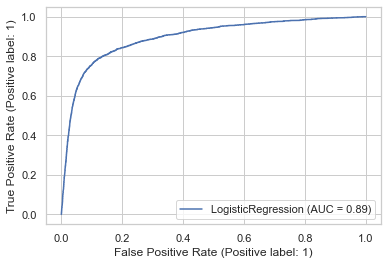

In [72]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n",classification_report(y_test, y_pred))
plot_roc_curve(model_pca,df_test_pca, y_test)
plt.show()

In [73]:
#Test Accuracy Score
metrics.accuracy_score(y_test, y_pred)

0.9116768665850673

In [74]:
confusion = metrics.confusion_matrix(y_test, y_pred)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [75]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.25493025493025495

In [76]:
# Let us calculate specificity
TN / float(TN+FP)

0.9861005123732693

###### HyperParameter tuning for Logistic Regression

In [77]:
from sklearn.model_selection import StratifiedKFold

grid = [
    {    "penalty":['l1','l2'],
         "C":[1.0,1.5,2.0,2.5,3,3.5]        
       
    }    
]

folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

logistic_gscv = GridSearchCV(LogisticRegression(solver='lbfgs'), grid, cv = folds , scoring = 'accuracy', verbose = 1, n_jobs = -1)


In [78]:
logistic_gfit = logistic_gscv.fit(df_train_pca, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [79]:
print("score : {}".format(logistic_gfit.best_score_))
logistic_params = logistic_gfit.best_params_
print(logistic_params)

score : 0.9119541714113272
{'C': 3, 'penalty': 'l2'}


In [80]:
lr_best = logistic_gfit.best_estimator_
lr_best

LogisticRegression(C=3)

In [81]:
y_pred_best = lr_best.predict(df_test_pca)
#Accuracy Score
metrics.accuracy_score(y_test, y_pred_best)

0.9117747858017136

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     18346
           1       0.68      0.26      0.37      2079

    accuracy                           0.91     20425
   macro avg       0.80      0.62      0.66     20425
weighted avg       0.90      0.91      0.89     20425



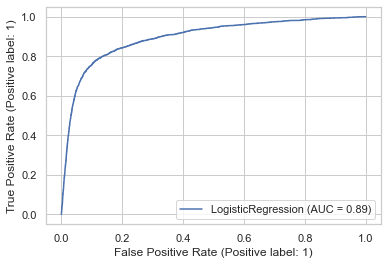

In [82]:
print(classification_report(y_test, y_pred_best))
plot_roc_curve(lr_best,df_test_pca, y_test)
plt.show()

For Logistic regression AUC looks good approximately equal to 0.90.  Will check with other models for improvements.

There is no major change even after hyperparameter tuning for logistic regression.So we can go with default params.

### Decision Trees with HyperParameter tuning

In [83]:
dt = DecisionTreeClassifier(random_state=42)
#dt = DecisionTreeClassifier(random_state=100)

In [84]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [15,20,25,30,35,40,45,50,55,60],
    'min_samples_leaf': [20, 50, 100,200,250,300],
    'criterion': ["gini", "entropy"]
}

In [85]:

grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=folds, n_jobs=-1, verbose=1, scoring = "accuracy")

In [86]:
%%time
grid_search.fit(df_train_pca, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
Wall time: 9min 9s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [15, 20, 25, 30, 35, 40, 45, 50, 55, 60],
                         'min_samples_leaf': [20, 50, 100, 200, 250, 300]},
             scoring='accuracy', verbose=1)

In [87]:
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(max_depth=15, min_samples_leaf=200, random_state=42)

In [88]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(df_train_pca)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(df_train_pca)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(df_test_pca)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(df_test_pca)))


In [89]:
evaluate_model(dt_best)

Train Accuracy : 0.9150596974211553
Train Confusion Matrix:
[[41989   816]
 [ 3232  1620]]
--------------------------------------------------
Test Accuracy : 0.9086903304773561
Test Confusion Matrix:
[[17875   471]
 [ 1394   685]]


              precision    recall  f1-score   support

           0       0.93      0.97      0.95     18346
           1       0.59      0.33      0.42      2079

    accuracy                           0.91     20425
   macro avg       0.76      0.65      0.69     20425
weighted avg       0.89      0.91      0.90     20425



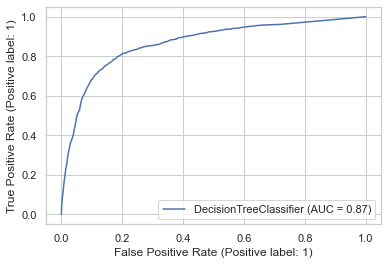

In [90]:
print(classification_report(y_test, dt_best.predict(df_test_pca)))
plot_roc_curve(dt_best, df_test_pca, y_test)
plt.show()

### RandomForests with HyperParamater tuning

In [91]:
rf = RandomForestClassifier(n_jobs=-1,random_state=42)
#rf = RandomForestClassifier(random_state=100, n_jobs=-1)
#rf_params = {
#    'max_depth': [2,3,5,10,20],
#    'min_samples_leaf': [5,10,20,50,100,200],
#    'n_estimators': [10, 25, 50, 100]}
#
rf_params = {
    'max_depth': [15,20,25,30,25],
    'min_samples_leaf': [10,20,50,75,100],
    'n_estimators': [10, 25, 50, 100, 200]
}

grid_search = GridSearchCV(estimator=rf,
                           param_grid=rf_params,
                           cv = folds,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(df_train_pca, y_train)

Fitting 5 folds for each of 125 candidates, totalling 625 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [15, 20, 25, 30, 25],
                         'min_samples_leaf': [10, 20, 50, 75, 100],
                         'n_estimators': [10, 25, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [92]:
print("Best Score", grid_search.best_score_)
rf_best = grid_search.best_estimator_
rf_best

Best Score 0.9123318950424071


RandomForestClassifier(max_depth=20, min_samples_leaf=10, n_jobs=-1,
                       random_state=42)

In [93]:
evaluate_model(rf_best)

Train Accuracy : 0.9420651740562771
Train Confusion Matrix:
[[42733    72]
 [ 2689  2163]]
--------------------------------------------------
Test Accuracy : 0.9140269277845777
Test Confusion Matrix:
[[18177   169]
 [ 1587   492]]


              precision    recall  f1-score   support

           0       0.92      0.99      0.95     18346
           1       0.74      0.24      0.36      2079

    accuracy                           0.91     20425
   macro avg       0.83      0.61      0.66     20425
weighted avg       0.90      0.91      0.89     20425



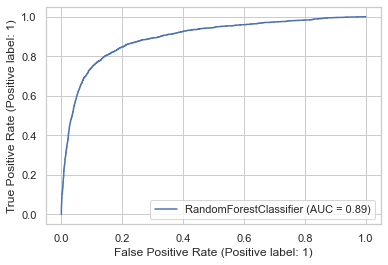

In [94]:
print(classification_report(y_test, rf_best.predict(df_test_pca)))
plot_roc_curve(rf_best,df_test_pca, y_test)
plt.show()

Based on the output accuracy scores, random forest model is observed to give the best output & hence, CSV file for internal submission will be based on random forest model

### Creating csv file for submission

In [97]:
#Scaling test data
telecom_test_sc = scaler.transform(telecom_test)
#Applying PCA
telecom_test_sc_pca = pca_ag.transform(telecom_test_sc)
#Final Predictions
y_pred_final = rf_best.predict(telecom_test_sc_pca)
#Reading sample.csv file
sample = pd.read_csv('sample.csv')
#Replacing Churn Probability with final predcitions
sample['churn_probability'] = y_pred_final
print(sample.churn_probability.value_counts())
#Creating new csv file named Submission
submission = sample.to_csv('Submission.csv',index=False)

0    29051
1      949
Name: churn_probability, dtype: int64


### Other models which were tried for Kaggle submission

In [ ]:
#XGBoost

In [95]:
xgb_cfl = xgb.XGBClassifier(n_jobs=-1)
# A parameter grid for XGBoost
#xgb_parameters={
#                'max_depth':[20,25,30],
#                'min_samples_leaf': [50,75,100,200],
#                'learning_rate':[0.01,0.05]}
xgb_parameters = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [4, 5, 7, 10]
        }

grid_search_xgb = GridSearchCV(estimator=xgb_cfl,
                           param_grid=xgb_parameters,
                           cv = folds,
                           n_jobs=-1, verbose=1, scoring="accuracy")



In [ ]:
grid_search_xgb.fit(df_train_pca, y_train)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


In [ ]:
print('\n Best estimator:')
print(grid_search_xgb.best_estimator_)
print(grid_search_xgb.best_score_ )
print('\n Best hyperparameters:')
print(grid_search_xgb.best_params_)

xgb_best=grid_search_xgb.best_estimator_

In [ ]:
evaluate_model(xgb_best)

In [ ]:
print(classification_report(y_test, xgb_best.predict(df_test_pca)))
plot_roc_curve(xgb_best,df_test_pca, y_test)
plt.show()

In [ ]:
#SVM

In [72]:
# Model Building
# SVM (lets start with linear SVM)
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

lr = LogisticRegression()

lr.svm = SVC(kernel='linear') 
lr.svm.fit(df_train_pca,y_train)
preds = lr.svm.predict(df_test_pca)
metrics.accuracy_score(y_test, preds)

# linear SVM gave us accuracy of 94% on test data

0.8982129742962056

##### Logistic Regression with RFE

In [218]:
logreg = LogisticRegression()
rfe = RFE(logreg,n_features_to_select=40)             # running RFE with 40 variables as output
rfe = rfe.fit(X_train_sc, y_train)
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('id', False, 113),
 ('arpu_6', True, 1),
 ('arpu_7', True, 1),
 ('arpu_8', True, 1),
 ('roam_ic_mou_6', False, 10),
 ('roam_ic_mou_7', False, 63),
 ('roam_ic_mou_8', False, 64),
 ('roam_og_mou_6', False, 94),
 ('roam_og_mou_7', False, 38),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_6', False, 7),
 ('loc_og_t2t_mou_7', False, 54),
 ('loc_og_t2t_mou_8', False, 25),
 ('loc_og_t2m_mou_6', False, 70),
 ('loc_og_t2m_mou_7', False, 56),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', False, 69),
 ('loc_og_t2f_mou_7', False, 40),
 ('loc_og_t2f_mou_8', False, 112),
 ('loc_og_t2c_mou_6', False, 71),
 ('loc_og_t2c_mou_7', False, 72),
 ('loc_og_t2c_mou_8', False, 30),
 ('loc_og_mou_6', False, 92),
 ('loc_og_mou_7', False, 58),
 ('loc_og_mou_8', True, 1),
 ('std_og_t2t_mou_6', False, 105),
 ('std_og_t2t_mou_7', False, 42),
 ('std_og_t2t_mou_8', False, 83),
 ('std_og_t2m_mou_6', False, 108),
 ('std_og_t2m_mou_7', False, 57),
 ('std_og_t2m_mou_8', True, 1),
 ('std_og_t2f_mou_6', False, 74

In [219]:
X_train_sc_df = pd.DataFrame(X_train_sc, columns = X_train.columns)
X_train_sc_df.head()

id  arpu_6  arpu_7  arpu_8  roam_ic_mou_6  roam_ic_mou_7  \
0 -0.7362  0.7478  0.2888  0.1641        -0.1590        -0.1157   
1 -0.5141  0.1982  0.1734  0.0399        -0.0916        -0.1157   
2 -0.7423 -0.4260 -0.0666  0.0782        -0.1590        -0.1157   
3 -0.5418  0.7242  1.0088  1.1161        -0.1590        -0.1157   
4 -0.9844  0.8627 -0.6574 -0.0647        -0.1590        -0.1157   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  ...  \
0        -0.1231        -0.2014        -0.1729        -0.1666  ...   
1        -0.1231        -0.0979        -0.1729        -0.1666  ...   
2        -0.1231        -0.2014        -0.1729        -0.1666  ...   
3        -0.1231        -0.2014        -0.1729        -0.1666  ...   
4        -0.1231        -0.2014        -0.1729        -0.1666  ...   

   recent_rech_8  recent_rech_data_6  recent_rech_data_7  recent_rech_data_8  \
0        -0.3924              2.4349             -0.4220              2.5348   
1        -0.7182             -0.4212             -0.4220             -0.4320   
2        -0.3924             -0.4212             -0.4220             -0.4320   
3        -0.7182              1.4829              1.8764              0.9030   
4        -0.2294             -0.4212             -0.4220              0.1613   

   total_mou_6  total_mou_7  total_mou_8  total_internet_vol_6  \
0       0.1064      -0.4961      -0.1245                0.7633   
1       0.0524      -0.0162       0.0167               -0.3749   
2      -0.3885      -0.1974      -0.1181               -0.3749   
3       0.6382       0.6132       0.1481                1.6604   
4       0.3437      -0.5178      -0.6834               -0.3749   

   total_internet_vol_7  total_internet_vol_8  
0               -0.3763               -0.3327  
1               -0.3763               -0.3811  
2               -0.3763               -0.3811  
3                2.9846                4.4402  
4               -0.3763                3.8400  

[5 rows x 152 columns]

In [220]:
col = X_train_sc_df.columns[rfe.support_]

In [222]:
grid = [
    {    "penalty":['l1','l2'],
          "class_weight":[{0:1,1:1}, {0:1,1:2}, {0:1,1:3}]
       
    }    
]

logistic_gscv = GridSearchCV(LogisticRegression(solver='lbfgs'), grid, cv = folds , scoring = 'accuracy', verbose = 1, n_jobs = -1)

In [223]:
logistic_gfit = logistic_gscv.fit(X_train_sc_df[col], y_train)


Fitting 5 folds for each of 6 candidates, totalling 30 fits


In [224]:
print("score : {}".format(logistic_gfit.best_score_))
logistic_params = logistic_gfit.best_params_
print(logistic_params)

score : 0.9186268867634395
{'class_weight': {0: 1, 1: 2}, 'penalty': 'l2'}


In [226]:
lr_best_2 = logistic_gfit.best_estimator_
print(lr_best_2.coef_.shape)
lr_best_2.coef_

(1, 40)


array([[ 0.38822813,  0.28771507,  0.2599561 ,  0.14792623, -0.41881825,
        -0.44501399,  0.10027852,  0.13102157, -0.16356532, -1.10573095,
        -0.36351291, -1.10775645, -0.78047905,  0.33500424, -0.59253809,
         0.1349093 , -0.8218554 , -0.12415718,  0.14006579, -0.88051992,
        -0.10345808, -1.0855735 ,  0.18241486, -0.73572593, -0.14589544,
        -0.16090047, -0.13714932, -0.54055309, -0.12916341, -0.18860405,
        -0.09568533, -0.13518732, -0.11292434,  0.24649712,  0.14453248,
        -0.09835914, -0.37177101,  0.22567644, -0.47956653, -0.33457253]])

In [231]:
LR_result = pd.DataFrame(lr_best_2.coef_.reshape(40,1), index = col, columns = ['Coef'])
LR_result.sort_values(by = 'Coef', ascending = False).head(40)

Coef
arpu_6                0.3882
loc_ic_mou_7          0.3350
arpu_7                0.2877
arpu_8                0.2600
arpu_3g_8             0.2465
total_mou_6           0.2257
isd_ic_mou_8          0.1824
roam_og_mou_8         0.1479
arpu_2g_7             0.1445
total_ic_mou_6        0.1401
std_ic_t2t_mou_7      0.1349
std_og_mou_6          0.1310
std_og_t2m_mou_8      0.1003
count_rech_2g_8      -0.0957
monthly_2g_8         -0.0984
spl_ic_mou_7         -0.1035
av_rech_amt_data_7   -0.1129
std_ic_mou_8         -0.1242
total_rech_data_8    -0.1292
count_rech_3g_8      -0.1352
max_rech_amt_8       -0.1371
total_rech_amt_6     -0.1459
max_rech_amt_7       -0.1609
spl_og_mou_8         -0.1636
max_rech_data_8      -0.1886
total_internet_vol_8 -0.3346
total_og_mou_6       -0.3635
aon                  -0.3718
loc_og_t2m_mou_8     -0.4188
loc_og_mou_8         -0.4450
total_mou_8          -0.4796
last_day_rch_amt_8   -0.5406
loc_ic_mou_8         -0.5925
total_rech_num_8     -0.7357
loc_ic_t2f_mou_8     -0.7805
std_ic_t2f_mou_8     -0.8219
total_ic_mou_8       -0.8805
spl_ic_mou_8         -1.0856
og_others_8          -1.1057
loc_ic_t2m_mou_8     -1.1078

#### Random Forest with RFE

In [233]:

rf_params_rfe = {
    'max_depth': [15,20,25,30,25],
    'min_samples_leaf': [10,20,50,75,100],
    'n_estimators': [10, 25, 50, 100, 200],
    'class_weight':[{0:1,1:2}, {0:1,1:3}],
    'max_features' : [20,30]
}


gscv2 = RandomizedSearchCV(RandomForestClassifier(random_state = 42), rf_params_rfe, cv = folds , scoring = 'accuracy', verbose = 1, n_jobs = -1)

In [234]:
rf_gfit = gscv2.fit(X_train_sc_df[col], y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [236]:
print("score : {}".format(rf_gfit.best_score_))
rf_gfit.best_params_
rf_best_2 = rf_gfit.best_estimator_

score : 0.9405123718248198


In [240]:
print("Train Accuracy :", accuracy_score(y_train, rf_best_2.predict(X_train_sc_df[col])))
print("Train Confusion Matrix:")
print(confusion_matrix(y_train, rf_best_2.predict(X_train_sc_df[col])))
print("-"*50)
print("Test Accuracy :", accuracy_score(y_test, rf_best_2.predict(X_test[col])))
print("Test Confusion Matrix:")
print(confusion_matrix(y_test,rf_best_2.predict(X_test[col])))


Train Accuracy : 0.9475627924544139
Train Confusion Matrix:
[[41665  1111]
 [ 1388  3493]]
--------------------------------------------------
Test Accuracy : 0.8996328029375765
Test Confusion Matrix:
[[18375     0]
 [ 2050     0]]


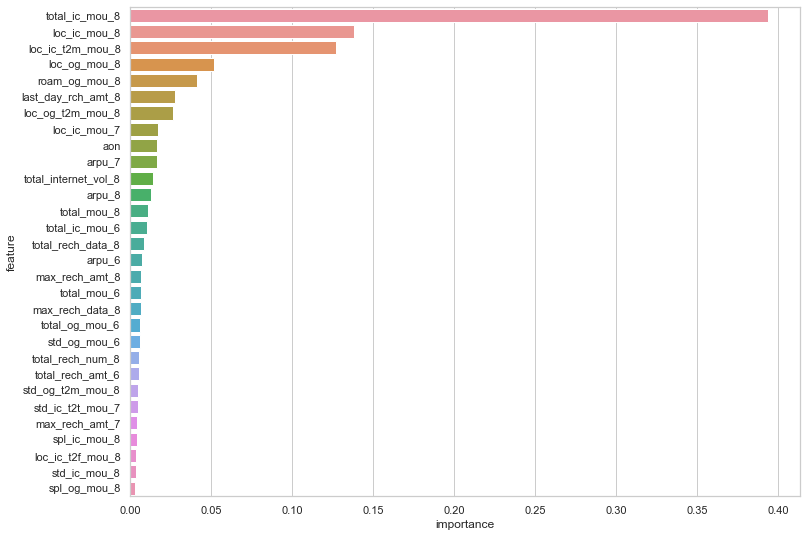

In [241]:
rf_df = pd.DataFrame({'feature' : X_train_sc_df[col].columns, 'importance' : rf_best_2.feature_importances_})
rf_df = rf_df.sort_values(by = 'importance', ascending = False).head(30)
fig = plt.figure(figsize = (12, 9))
sns.barplot(data = rf_df, y = 'feature', x = 'importance')
plt.show()

##### Observations
- Most of the Important Features are Minutes of Usage of Incoming and Outgoing Calls.
- ARPU is also an Important Feature in Prediciting The Risk of Churn.
- Total Internet usage either 2g or 3g in August Month is also an important Feature in Predicting Risk of Churn.
- Max Recharge Amount could be a good Churn Indicator